In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/OS Collected Data/sample/Training'
categories = ['Normal', 'Osteopenia', 'Osteoporosis']
img_size = 100  # Resize images

X = []  # Features
y = []  # Labels

for label in categories:
    folder_path = os.path.join(data_dir, label)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Grayscale
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))  # Resize to img_size
            img = img / 255.0  # Normalize
            X.append(img.flatten())  # Flatten image for KNN
            y.append(label)

X = np.array(X)
y = np.array(y)


In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Convert string labels to integers


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

Accuracy: 0.842948717948718
Classification Report:
               precision    recall  f1-score   support

      Normal       0.92      0.85      0.88       137
  Osteopenia       0.78      0.82      0.80        56
Osteoporosis       0.80      0.85      0.82       119

    accuracy                           0.84       312
   macro avg       0.83      0.84      0.83       312
weighted avg       0.85      0.84      0.84       312



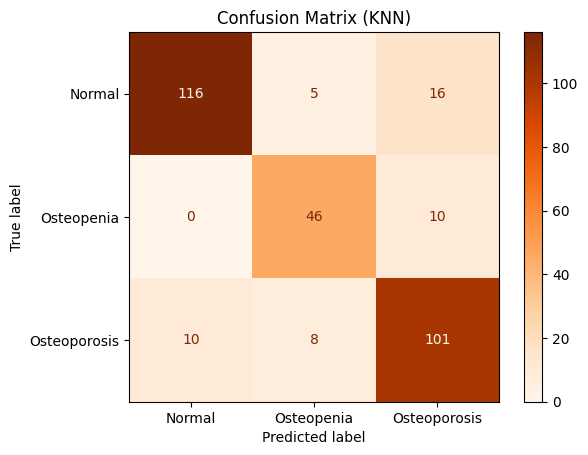

In [ ]:
# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_knn, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix (KNN)")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_base.py:395: RuntimeWarning: invalid value encountered in divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_base.py:395: RuntimeWarning: invalid value encountered in divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Cons

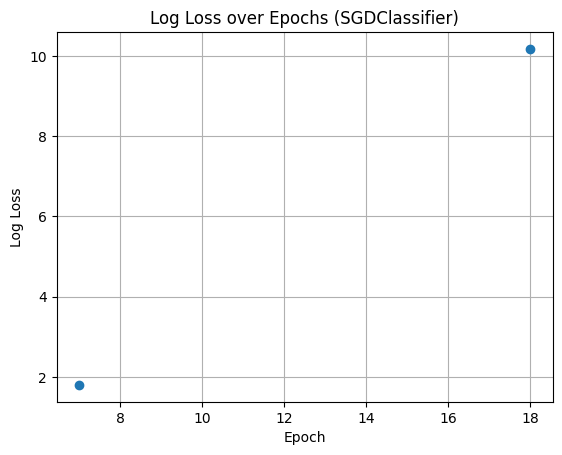

In [ ]:
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import numpy as np

# Initialize model with log_loss
clf = SGDClassifier(loss='log_loss', max_iter=1, warm_start=True)

losses = []
epochs = 30

# Train model over several epochs and track the loss
for epoch in range(epochs):
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_train)

    # Compute log loss
    eps = 1e-15
    y_prob = np.clip(y_prob, eps, 1 - eps)
    log_loss = -np.mean(np.log(y_prob[range(len(y_train)), y_train]))
    losses.append(log_loss)

# Plot loss over epochs
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Log Loss over Epochs (SGDClassifier)')
plt.grid(True)
plt.show()


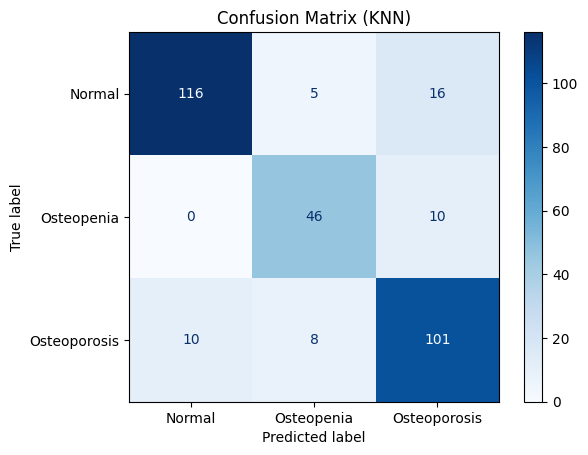

Classification Report:
               precision    recall  f1-score   support

      Normal       0.92      0.85      0.88       137
  Osteopenia       0.78      0.82      0.80        56
Osteoporosis       0.80      0.85      0.82       119

    accuracy                           0.84       312
   macro avg       0.83      0.84      0.83       312
weighted avg       0.85      0.84      0.84       312



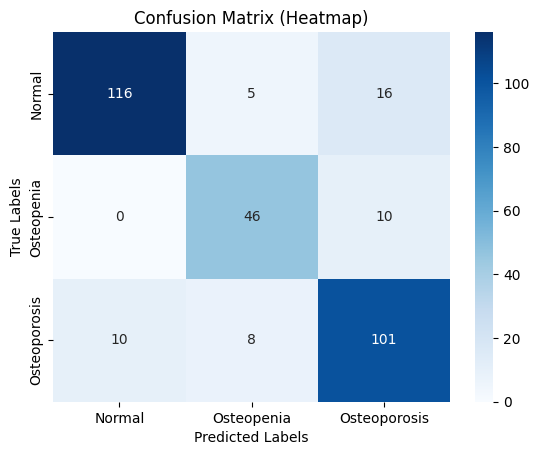

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (KNN)")
plt.show()

# Classification Report
report = classification_report(y_test, y_pred_knn, target_names=le.classes_)
print("Classification Report:\n", report)

# Optional: Heatmap for better visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix (Heatmap)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
